# All Player Report

## Section 1: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corr()*

### Findings Summary (Average)
1. Strong correlation between *max_pitching_shoulder_external_rotation* and *fatigue_score* with a **threshold = 0.50**
2. Moderate correlation between *arm_slot_degree_at_release* and *fatigue_score* with a **threshold = 0.46**
3. Moderate correlation between *knee_flexion_extension_drive_leg_at_release* and *fatigue_score* with a **threshold = 0.43**
4. Moderate correlation between *trunk_forward_bend_at_footstrike* and *fatigue_score* with a **threshold = 0.42**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# import csv files as dataframes 
fatigue = pd.read_csv('fatigue_index.csv', index_col=False)
pitching = pd.read_csv('pitching_mechanics.csv', index_col=False)

In [3]:
# drop rows with values = NaN
fatigue.dropna(inplace=True)
pitching.dropna(inplace=True)

In [4]:
fatigue.head()

,player_id,report_date,game_date,score,last_outing_pitches,pitch_last_4_days,consec,cumulative_inning_pitched
0,pitcher A,2022-04-09,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
1,pitcher A,2022-04-10,2022-04-01 00:00:00.000000 UTC,0.000000,33.0,0.0,0,0.0
2,pitcher A,2022-04-11,2022-04-10 00:00:00.000000 UTC,12.157287,16.0,16.0,1,2.0
3,pitcher A,2022-04-12,2022-04-10 00:00:00.000000 UTC,5.269455,16.0,16.0,1,2.0
4,pitcher A,2022-04-13,2022-04-12 00:00:00.000000 UTC,17.126998,21.0,37.0,2,3.0


In [5]:
# convert to datetime and format as 'YYYY-MM-DD'
# necessary to join data later
fatigue['game_date'] = pd.to_datetime(fatigue['game_date'].str.replace(" UTC", "", regex=False)).dt.strftime('%Y-%m-%d')

In [6]:
# grab the date of the games 
pitching_game_dates = pitching['game_date'].unique().tolist()

In [7]:
# return correlated markers based on given threshold
def get_correlated_markers(df, threshold):
    # create an empty dictionary to store the correlated markers
    correlated_markers = {}
    # iterate through the columns of the dataframe
    for marker in df.columns:
        # if the correlation value is greater than the threshold and the marker is not the fatigue_score
        # add the marker and correlation value to the dictionary
        if abs(df[marker].corr(df['fatigue_score'])) > threshold and marker != 'fatigue_score':
            correlated_markers[marker] = df[marker].corr(df['fatigue_score'])
    return correlated_markers

In [8]:
# get the average values for each biomechanical marker for each game
# append the fatigue score for each game to the dataframe
# I will use this dataframe to run the correlation analysis
def get_average(df1, df2, dates):
    # create an empty list to store the dataframes
    mean_df = []
    # iterate through the list of dates
    for date in dates:
        # since there arn't as many game dates in player D's fatigue data, it is necessary to account for missing dates
        if (df1[df1['game_date'] == date].empty):
            continue
        # get the first row of the fatigue dataframe for the date
        # I only care about the first row because the fatigue score is highest the day after the game
        temp_fatigue = df1[df1['game_date'] == date].iloc[0:1]
        fatigue_score = temp_fatigue['score'].values[0]

        # get the rows of the pitching dataframe for the date
        temp_pitching = df2[df2['game_date'] == date].copy()
        # drop columns that mess with the mean() function
        temp_pitching.drop(['player_id', 'game_date', 'pitcher_throws', 'inning', 'pitch_type', 'pitch_release_velocity', 'pitch_spin_rate'], axis=1, inplace=True)
        # create a df with the mean values for each biomechanical marker
        temp_pitching_mean = temp_pitching.mean().to_frame().T
        # add the fatigue score to the dataframe
        temp_pitching_mean['fatigue_score'] = fatigue_score
        #temp_pitching_mean.insert(0, 'game_date', date)
        
        # append the dataframe to the list
        mean_df.append(temp_pitching_mean)

    # concatenate the list of dataframes into one dataframe
    return pd.concat(mean_df)

In [9]:
average_df = get_average(fatigue, pitching, pitching_game_dates)

In [10]:
average_df.head()

,hip_shoulder_separation_at_footstrike,pitching_shoulder_abduction_at_footstrike,pitching_shoulder_horizontal_abduction_at_footstrike,pitching_shoulder_internal_rotation_external_rotation_at_footstrike,pitching_elbow_flexion_extension_at_footstrike,hip_flexion_extension_drive_leg_at_footstrike,hip_abduction_adduction_drive_leg_at_footstrike,hip_internal_rotation_external_rotation_drive_leg_at_footstrike,hip_flexion_extension_lead_leg_at_footstrike,hip_abduction_adduction_lead_leg_at_footstrike,...,knee_flexion_extension_drive_leg_at_release,knee_flexion_extension_lead_leg_at_release,trunk_forward_bend_at_release,trunk_side_bend_at_release,trunk_rotation_at_release,pelvis_rotation_at_release,arm_slot_degree_at_release,max_pitching_shoulder_external_rotation,max_hip_shoulder_separation,fatigue_score
0,-34.411558,83.978848,30.330391,-43.015321,90.480043,-9.725656,39.829389,42.645631,37.449318,39.590178,...,37.984278,26.545336,4.981479,50.438907,113.421104,55.684659,55.363636,-174.036429,-42.081399,12.157287
0,-41.517875,85.059820,27.028577,-47.205528,87.401872,-9.258897,36.486958,34.826454,42.408743,37.493770,...,43.638823,20.857963,11.634140,47.803134,109.681550,56.913345,57.650000,-175.302948,-47.227465,17.126998
0,-37.222450,84.328100,25.374586,-47.519089,91.806978,-10.189256,39.027669,36.710912,41.494876,39.667345,...,42.701772,29.790247,10.031706,47.679520,112.964604,56.916850,54.571429,-178.227098,-45.720313,6.197512
0,-39.791155,84.382050,23.821452,-47.129099,86.573839,-11.549337,38.741103,33.247042,41.623484,39.213090,...,37.001443,30.109105,9.138538,50.357471,112.584427,58.744351,54.466667,-174.490680,-46.599130,17.059028
0,-34.990861,86.887836,22.812613,-54.387868,83.903239,2.301261,39.960481,47.853216,43.211793,44.893911,...,46.361451,28.711725,19.981536,47.583138,117.669077,64.083765,62.424242,-182.969282,-48.128422,20.933368


In [11]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(average_df, 0.5)

{}

In [12]:
# get correlated markers with a threshold of 0.5
get_correlated_markers(average_df, 0.4)

{'trunk_forward_bend_at_footstrike': 0.4169218952944973,
 'knee_flexion_extension_drive_leg_at_release': 0.42697337119369666,
 'arm_slot_degree_at_release': 0.4582134956996996,
 'max_pitching_shoulder_external_rotation': -0.49723396150472987}

## Section 2: Performing Correlation on all Biomechanical Markers Irrelevant of Pitch Type Using *.corrwith()* and Linear Regression

### Finding Summary (Average):
Many biomechanical markers are strongly correlated, inluding but not limited to...
1. *max_pitching_shoulder_external_rotation* with **p=5.335054e-07**
2. *arm_slot_degree_at_release* with **p=4.942227e-06**
3. *knee_flexion_extension_drive_leg_at_release* with **p=2.435668e-05**
4. *trunk_forward_bend_at_footstrike* with **p=3.938864e-05**
5. *pitching_shoulder_internal_rotation_external_rotation_at_release* with **p=8.637594e-05**
6. *hip_flexion_extension_drive_leg_at_release* with **p=1.265400e-04**

In [13]:
# drop the fatigue_score column to use the biomechanical markers as features
features = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
target = average_df['fatigue_score']

In [14]:
# Compute correlations
correlations = features.corrwith(target).sort_values(ascending=False)
print("Correlation of biomechanical markers with fatigue score:\n", correlations)

Correlation of biomechanical markers with fatigue score:
 arm_slot_degree_at_release                                             0.458213
knee_flexion_extension_drive_leg_at_release                            0.426973
trunk_forward_bend_at_footstrike                                       0.416922
hip_flexion_extension_drive_leg_at_release                             0.391096
knee_flexion_extension_lead_leg_at_footstrike                          0.382218
hip_flexion_extension_drive_leg_at_footstrike                          0.371157
hip_flexion_extension_lead_leg_at_footstrike                           0.360621
pitching_shoulder_abduction_at_footstrike                              0.360078
hip_abduction_adduction_lead_leg_at_footstrike                         0.264340
trunk_side_bend_at_footstrike                                          0.236077
trunk_rotation_at_release                                              0.213937
hip_internal_rotation_external_rotation_lead_leg_at_release   

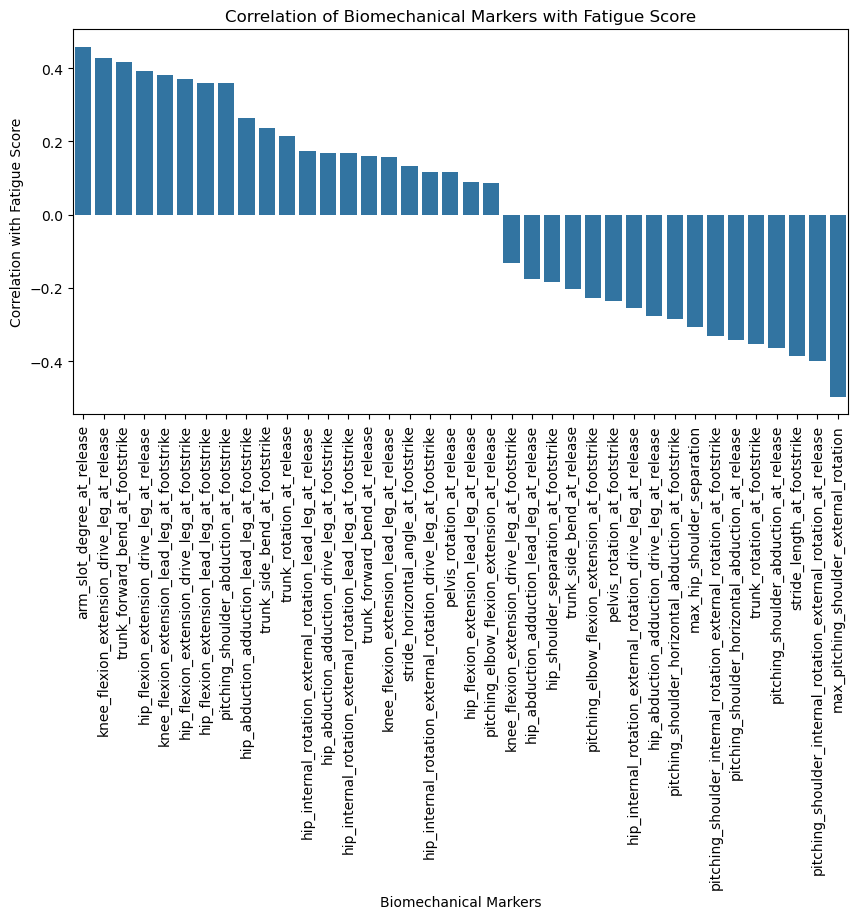


Feature Importance:
                                               Feature  Coefficient    F-Value  \
36            max_pitching_shoulder_external_rotation    -1.152441  29.231828   
35                         arm_slot_degree_at_release    -0.163421  23.652468   
29        knee_flexion_extension_drive_leg_at_release    -0.525143  19.842707   
13                   trunk_forward_bend_at_footstrike    -2.514622  18.725213   
21  pitching_shoulder_internal_rotation_external_r...    -0.383858  16.930314   
23         hip_flexion_extension_drive_leg_at_release    -0.145551  16.071304   
18                        stride_length_at_footstrike     3.602082  15.552597   
12      knee_flexion_extension_lead_leg_at_footstrike     0.473000  15.226502   
5       hip_flexion_extension_drive_leg_at_footstrike    -0.811630  14.219227   
19             pitching_shoulder_abduction_at_release    -1.767586  13.469749   
8        hip_flexion_extension_lead_leg_at_footstrike     1.154900  13.304435   
1     

In [15]:
# Plot correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.xlabel("Biomechanical Markers")
plt.ylabel("Correlation with Fatigue Score")
plt.title("Correlation of Biomechanical Markers with Fatigue Score")
plt.show()

# Feature selection using linear regression
reg = LinearRegression()
reg.fit(features, target)

# Compute F-statistics and p-values
f_values, p_values = f_regression(features, target)

# Create a DataFrame to summarize results
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': reg.coef_,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='P-Value')

print("\nFeature Importance:\n", feature_importance)

# Identify significant markers (p < 0.05)
significant_markers = feature_importance[feature_importance['P-Value'] < 0.05]
print("\nSignificant Biomechanical Markers:", significant_markers['Feature'].tolist())


## Section 3: Using a Random Forest

### Summary:
Finally, I tried using a machine learning model to see if I could catch any intricate patterns not noticed by the linear regression model. Here I see the two highests rated are *arm_slot_degree_at_release* and *pitching_shoulder_internal_rotation_external_rotation_at_footstrike*.

In [16]:
# drop the fatigue_score column to use the biomechanical markers as features
X = average_df.drop('fatigue_score', axis=1)
# set the target variable as the fatigue_score
y = average_df['fatigue_score']

# create a random forest regressor model
model = RandomForestRegressor()
# fit the model to the data
model.fit(X, y)

# get the feature importances from the model
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# print the feature importances
print(feature_importance)

arm_slot_degree_at_release                                             0.181657
pitching_shoulder_horizontal_abduction_at_release                      0.103986
max_pitching_shoulder_external_rotation                                0.075301
pitching_shoulder_internal_rotation_external_rotation_at_footstrike    0.056261
pitching_shoulder_abduction_at_release                                 0.036111
pitching_shoulder_internal_rotation_external_rotation_at_release       0.035610
trunk_forward_bend_at_footstrike                                       0.033617
hip_internal_rotation_external_rotation_lead_leg_at_release            0.033120
trunk_side_bend_at_release                                             0.030639
hip_abduction_adduction_drive_leg_at_footstrike                        0.028752
knee_flexion_extension_lead_leg_at_footstrike                          0.028445
hip_abduction_adduction_lead_leg_at_footstrike                         0.028265
stride_horizontal_angle_at_footstrike   